In [155]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()

df = pd.read_stata('pwt91.dta')

df.head()

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
0,ABW,Aruba,Aruban Guilder,1950,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,Aruban Guilder,1951,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,Aruban Guilder,1952,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,Aruban Guilder,1953,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,Aruban Guilder,1954,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [217]:
table = pd.pivot_table(df,index='year',columns='country',values=['csh_i','csh_x','pl_gdpo','csh_m','rgdpna','cgdpo','emp'])

data = pd.DataFrame(index=pd.MultiIndex.from_product([np.arange(1950,2018),df['country'].unique()],names=['year','country']))


data['level'] = ((table['cgdpo']/table['emp']).div((table['cgdpo']/table['emp'])['United States'],axis=0)).stack()
data['growth'] = np.log(table['rgdpna']/table['emp']).diff(10).shift(-10).stack()/10
data['exp'] = table['csh_x'].rolling(10).mean().shift(-10).stack()
data['imp'] = table['csh_m'].rolling(10).mean().shift(-10).stack()
data['net'] = data['exp']-data['imp']
data['inv'] = table['csh_i'].rolling(10).mean().shift(-10).stack()
data['pl'] = table['pl_gdpo'].rolling(10).mean().shift(-10).stack()

'''
data['level'] = ((table['cgdpo']/table['emp']).div((table['cgdpo']/table['emp'])['United States'],axis=0)).stack()
data['growth'] = np.log(table['rgdpna']/table['emp']).diff().rolling(5).mean().shift(-5).stack()
data['exp'] = table['csh_x'].rolling(5).mean().shift(-5).stack()
data['imp'] = table['csh_m'].rolling(5).mean().shift(-5).stack()
data['net'] = data['exp']-data['imp']
data['open'] = data['exp']+data['imp']
data['inv'] = table['csh_i'].rolling(5).mean().shift(-5).stack()
data['pl'] = table['pl_gdpo'].rolling(5).mean().shift(-5).stack()
'''

#data = data[data['level']>1/5]

data = data.reset_index()
data['decade'] = pd.cut(data['year'],np.arange(1950,2020,10),labels=['{}s'.format(i) for i in np.arange(1950,2010,10)],right=False)
data.dropna(inplace=True)
data = data[data['year']%10==0]

data.head()

,year,country,level,growth,exp,imp,net,inv,pl,decade
5,1950,Argentina,0.182353,0.017268,0.099413,-0.054336,0.153749,0.122483,0.285977,1950s
8,1950,Australia,0.819828,0.021251,0.105655,-0.107853,0.213508,0.348606,0.114657,1950s
9,1950,Austria,0.356226,0.038600,0.081834,-0.114227,0.196062,0.190094,0.091778,1950s
12,1950,Belgium,0.550311,0.027277,0.327230,-0.374179,0.701408,0.274440,0.122738,1950s
23,1950,Bolivia (Plurinational State of),0.113364,0.016423,0.337581,-0.123005,0.460586,0.144275,0.092465,1950s


In [218]:
import statsmodels.formula.api as smf

res = smf.ols('growth ~ np.log(level) + inv + exp + imp + C(year) + country',data=data).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 growth   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     4.619
Date:                Sun, 29 Dec 2019   Prob (F-statistic):           1.61e-43
Time:                        19:57:31   Log-Likelihood:                 1867.4
No. Observations:                 724   AIC:                            -3369.
Df Residuals:                     541   BIC:                            -2530.
Df Model:                         182                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                                        -0.0543      0.013     -4.210      0.000      -0.080      -0.029
C(year)[T.1960]                                   0.0055      0.004      1.408      0.160      -0.002       0.013
C(year)[T.1970]                                  -0.0059      0.004     -1.539      0.124      -0.014       0.002
C(year)[T.1980]                                  -0.0162      0.004     -4.273      0.000      -0.024      -0.009
C(year)[T.1990]                                  -0.0143      0.004     -3.800      0.000      -0.022      -0.007
C(year)[T.2000]                                  -0.0082      0.004     -2.098      0.036      -0.016      -0.001
country[T.Algeria]                                0.0059      0.015      0.384      0.701      -0.024       0.036
country[T.Angola]                                -0.0762      0.016     -4.780      0.000      -0.107      -0.045
country[T.Anguilla]                               0.0038      0.020      0.186      0.852      -0.036       0.043
country[T.Argentina]                             -0.0076      0.014     -0.550      0.583      -0.035       0.020
country[T.Armenia]                                0.0151      0.018      0.821      0.412      -0.021       0.051
country[T.Aruba]                                 -0.0016      0.025     -0.065      0.948      -0.051       0.047
country[T.Australia]                              0.0349      0.015      2.377      0.018       0.006       0.064
country[T.Austria]                                0.0382      0.014      2.649      0.008       0.010       0.066
country[T.Azerbaijan]                            -0.0025      0.018     -0.135      0.893      -0.039       0.034
country[T.Bahamas]                                0.0160      0.018      0.911      0.363      -0.018       0.050
country[T.Bahrain]                               -0.0072      0.016     -0.437      0.662      -0.039       0.025
country[T.Bangladesh]                            -0.0382      0.014     -2.651      0.008      -0.066      -0.010
country[T.Barbados]                               0.0499      0.015      3.307      0.001       0.020       0.080
country[T.Belarus]                                0.0309      0.019      1.669      0.096      -0.005       0.067
country[T.Belgium]                                0.0335      0.015      2.171      0.030       0.003       0.064
country[T.Belize]                                 0.0038      0.017      0.230      0.818      -0.029       0.037
country[T.Benin]                                 -0.0433      0.016     -2.641      0.009      -0.076      -0.011
country[T.Bermuda]                                0.0366      0.024      1.518      0.130      -0.011       0.084
count

<BarContainer object of 4 artists>

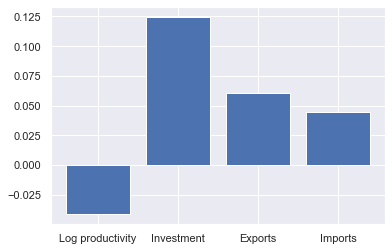

In [204]:
plt.bar(['Log productivity','Investment','Exports','Imports'],res.params[-4:])